In [4]:
import pandas as pd
import networkx as nx


In [5]:
from google.colab import files


uploaded = files.upload()



Saving musae_facebook_target.csv to musae_facebook_target (1).csv


In [7]:
from google.colab import files


uploaded = files.upload()

Saving musae_facebook_edges.csv to musae_facebook_edges (2).csv


In [8]:
df1=pd.read_csv("musae_facebook_target.csv")

In [9]:
df2=pd.read_csv("musae_facebook_edges.csv")

In [10]:
df1.describe()

,id,facebook_id
count,22470.00000,2.247000e+04
mean,11234.50000,3.516802e+14
std,6486.67461,4.931380e+14
min,0.00000,5.298600e+09
25%,5617.25000,1.137972e+14
50%,11234.50000,1.957086e+14
75%,16851.75000,4.277323e+14
max,22469.00000,1.015016e+16


In [11]:
df2.describe()

,id_1,id_2
count,171002.000000,171002.000000
mean,7880.865002,14617.111706
std,5576.987102,5508.263801
min,0.000000,14.000000
25%,3097.000000,10526.000000
50%,7062.000000,15568.000000
75%,11794.750000,19347.000000
max,22464.000000,22469.000000


In [12]:
G=nx.Graph()


In [13]:
df1.count()

id             22470
facebook_id    22470
page_name      22470
page_type      22470
dtype: int64

In [14]:
df2.count()

id_1    171002
id_2    171002
dtype: int64

In [15]:
for i in range(0,22470):
  ob=list(df1.loc[i])
  node1=int(ob[0])
  G.add_node(node1)

In [16]:
for i in range(0,171002):
  ob=list(df2.loc[i])
  node1=int(ob[0])
  node2=int(ob[1])
  G.add_edge(node1,node2)

In [17]:
len(list(G.nodes))

22470

In [23]:
high_degree_nodes = [node for node in G.nodes if G.degree[node] > 3]
len(list(high_degree_nodes))


15662

In [29]:
H = G.subgraph(high_degree_nodes)

In [30]:
len(list(H.nodes))

15662

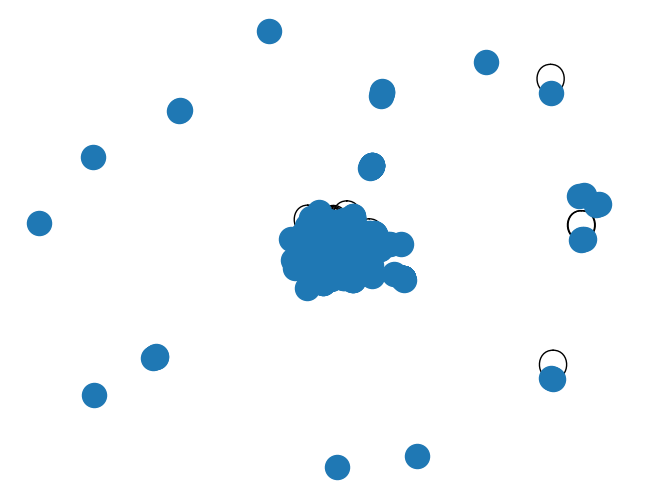

In [23]:
import matplotlib.pyplot as plt
nx.draw(H)

In [ ]:
degree = H.degree()
degree

In [25]:
nx.degree_centrality(H)

{1: 0.003982197235886624,
 2: 0.0011712344811431249,
 4: 0.0059732958538299364,
 5: 0.0022253455141719373,
 6: 0.0018739751698289998,
 13: 0.001991098617943312,
 14: 0.005856172405715624,
 18: 0.004099320684000937,
 19: 0.0008198641368001874,
 22: 0.0032794565472007496,
 26: 0.0035137034434293748,
 29: 0.0008198641368001874,
 32: 0.004567814476458187,
 37: 0.001991098617943312,
 39: 0.0010541110330288123,
 41: 0.001991098617943312,
 43: 0.0012883579292574374,
 44: 0.006910283438744436,
 45: 0.0010541110330288123,
 47: 0.0012883579292574374,
 49: 0.0032794565472007496,
 50: 0.0022253455141719373,
 51: 0.0008198641368001874,
 52: 0.00023424689622862497,
 55: 0.0015226048254860622,
 56: 0.0016397282736003748,
 57: 0.0010541110330288123,
 60: 0.0018739751698289998,
 61: 0.00515343171702975,
 64: 0.0026938393066291873,
 65: 0.0011712344811431249,
 70: 0.0022253455141719373,
 72: 0.0016397282736003748,
 74: 0.002928086202857812,
 77: 0.002928086202857812,
 81: 0.004333567580229562,
 88: 0.00

## Inference: The nodes are more likely to traverse through it's outgoing links(90%) rather than teleporting to a random node in the graph(10%) which can be understood from the value of alpha in page rank

In [33]:
def get_top_10_pagerank_nodes(H):
  pr = nx.pagerank(H, alpha=0.9)
  pr_sorted = sorted(pr.items(), key=lambda x: x[1], reverse=True)  # Sort nodes by PageRank score
  top_10_nodes = [node for node, score in pr_sorted[:10]]  # Get top 10 nodes by PageRank score
  return top_10_nodes



In [34]:
top_10_nodes = get_top_10_pagerank_nodes(H)

## Top 10 most visited pages/influencial nodes based on their pagerank value:

In [35]:
print(top_10_nodes)

[19743, 21729, 16895, 14497, 21120, 10379, 1387, 701, 19347, 13294]


In [36]:
communities = nx.algorithms.community.girvan_newman(H)


In [29]:
for c in next(communities):
  print(c)

In [30]:
import itertools
#first k tuples of communities
k=2
for comm in itertools.islice(communities, k):
    print(tuple(sorted(c) for c in comm))

## Betweeness centrality is `less efficient` for this dataset as it involves going through each and every shortest path reachable from the given node to a particular node divided by the shortest path reachable from a given node to a particular node via another node. It is the summation of that




In [ ]:
betweenness_centrality = nx.algorithms.betweenness_centrality(H)

# print nodes with highest betweenness centrality
for node, betweenness in sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True):
    print(node, betweenness)

KeyboardInterrupt: ignored

In [1]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [ ]:
edges = list(G.edges())
non_edges = list(nx.non_edges(G))



In [ ]:
|